In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import neattext.functions as nfx

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Emotion Detection In Text
+ Text Classifier

In [2]:
# Load ML Pkgs
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [3]:
# Load Dataset
df = pd.read_csv("data/emotion_dataset_raw.csv")

In [4]:
df.head()

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...


In [5]:
# Value Counts
df['Emotion'].value_counts()

Emotion
joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: count, dtype: int64

<AxesSubplot:xlabel='Emotion', ylabel='count'>

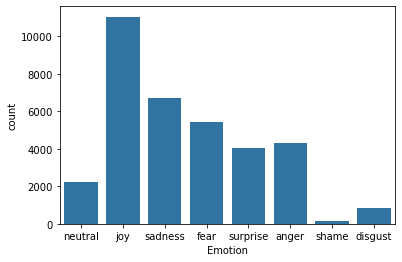

In [6]:
# Plot
sns.countplot(x='Emotion',data=df)

In [7]:
# Data Cleaning
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [8]:
# User handles
df['Clean_Text'] = df['Text'].apply(nfx.remove_userhandles)

In [9]:
# Stopwords
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_stopwords)

In [10]:
df

,Emotion,Text,Clean_Text
0,neutral,Why ?,?
1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL!!! MAN HATE FUNERALS...
3,joy,Such an eye ! The true hazel eye-and so brill...,eye ! true hazel eye-and brilliant ! Regular f...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe.. hugggzzz u .! babe naamazed nga ako...
...,...,...,...
34787,surprise,@MichelGW have you gift! Hope you like it! It'...,gift! Hope like it! hand wear ! It'll warm! Lol
34788,joy,The world didnt give it to me..so the world MO...,world didnt me..so world DEFINITELY cnt away!!!
34789,anger,A man robbed me today .,man robbed today .
34790,fear,"Youu call it JEALOUSY, I call it of #Losing YO...","Youu JEALOUSY, #Losing YOU..."


In [11]:
# Features & Labels
Xfeatures = df['Clean_Text']
ylabels = df['Emotion']

In [12]:
#  Split Data
x_train,x_test,y_train,y_test = train_test_split(Xfeatures,ylabels,test_size=0.3,random_state=42)

In [13]:
# Build Pipeline
from sklearn.pipeline import Pipeline

In [14]:
from sklearn.naive_bayes import MultinomialNB  #Multinomial Naive Bayes Model
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
pipe_nb = Pipeline(steps=[
    ('cv', CountVectorizer()),
    ('nb', MultinomialNB())
])
print("Done")

Done


In [15]:
pipe_nb.fit(x_train,y_train)

Pipeline(steps=[('cv', CountVectorizer()), ('nb', MultinomialNB())])

In [16]:
pipe_nb

Pipeline(steps=[('cv', CountVectorizer()), ('nb', MultinomialNB())])

In [17]:
pipe_nb.score(x_test,y_test)

0.5745353515999233

In [18]:
print("SVM MODEL")
from sklearn.svm import SVC #SVM Model
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

SVM MODEL


In [63]:
pipe_svm = Pipeline(steps=[
    ('tfidf', CountVectorizer()),
    ('svm', SVC(kernel='linear'))
])
print("Pipe")

Pipe


In [64]:
pipe_svm.fit(x_train,y_train) 
print("Training")

Training


In [21]:
pipe_svm

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svm', SVC(kernel='linear'))])

In [65]:
pipe_svm.score(x_test,y_test)

0.6010730024908987

In [25]:
from sklearn.ensemble import RandomForestClassifier #RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer

In [26]:
pipe_rf = Pipeline(steps=[
    ('cv', CountVectorizer()),
    ('rf', RandomForestClassifier())
])

In [27]:
pipe_rf.fit(x_train,y_train) 


Pipeline(steps=[('cv', CountVectorizer()), ('rf', RandomForestClassifier())])

In [28]:
pipe_rf

Pipeline(steps=[('cv', CountVectorizer()), ('rf', RandomForestClassifier())])

In [29]:
pipe_rf.score(x_test,y_test)

0.5846905537459284

In [60]:
from sklearn.ensemble import GradientBoostingClassifier #Gradient Boosting Classifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
pipe_gb = Pipeline(steps=[
    ('tfidf', CountVectorizer()),
    ('gb', GradientBoostingClassifier())
])

In [61]:
pipe_gb.fit(x_train,y_train)


Pipeline(steps=[('tfidf', CountVectorizer()),
                ('gb', GradientBoostingClassifier())])

In [62]:
pipe_gb.score(x_test,y_test)

0.528070511592259

In [42]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer

pipe_dt = Pipeline(steps=[
    ('cv', CountVectorizer()),
    ('dt', DecisionTreeClassifier())
])


In [36]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 3.3 MB/s eta 0:00:00m eta 0:00:010:00:01


In [43]:
pipe_dt.fit(x_train,y_train) 

Pipeline(steps=[('cv', CountVectorizer()), ('dt', DecisionTreeClassifier())])

In [45]:
pipe_dt.score(x_test,y_test)

0.5420578654914735

In [57]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
pipe_knn = Pipeline(steps=[
    ('tfidf', CountVectorizer()),
    ('knn', KNeighborsClassifier())
])

In [58]:
pipe_knn.fit(x_train,y_train) 

Pipeline(steps=[('tfidf', CountVectorizer()), ('knn', KNeighborsClassifier())])

In [59]:
pipe_knn.score(x_test,y_test)

0.22782142172830044

In [55]:
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

pipe_sgd = Pipeline(steps=[
    ('tfidf', CountVectorizer()),
    ('sgd', SGDClassifier())
])


In [56]:
pipe_sgd.fit(x_train,y_train) 
pipe_sgd.score(x_test,y_test)

0.6226288561027017

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

pipe_lr_tfidf = Pipeline(steps=[
    ('tfidf', CountVectorizer()),
    ('lr', LogisticRegression())
])
pipe_lr_tfidf.fit(x_train,y_train) 
pipe_lr_tfidf.score(x_test,y_test)

/home/richforever/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6201379574631155

In [68]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer

pipe_bnb = Pipeline(steps=[
    ('cv', CountVectorizer()),
    ('bnb', BernoulliNB())
])
pipe_bnb.fit(x_train,y_train) 
pipe_bnb.score(x_test,y_test)

0.5093887717953631

In [72]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

pipe_pa = Pipeline(steps=[
    ('cv', CountVectorizer()),
    ('pa', PassiveAggressiveClassifier())
])
pipe_pa.fit(x_train,y_train) 
pipe_pa.score(x_test,y_test)

0.561793447020502

In [75]:
from sklearn.linear_model import Perceptron
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

pipe_perc = Pipeline(steps=[
    ('cv', CountVectorizer()),
    ('perc', Perceptron())
])
pipe_pa.fit(x_train,y_train) 
pipe_pa.score(x_test,y_test)

0.5626556811649741

In [77]:
from sklearn.linear_model import RidgeClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

pipe_ridge = Pipeline(steps=[
    ('tfidf', CountVectorizer()),
    ('ridge', RidgeClassifier())
])
pipe_ridge.fit(x_train,y_train) 
pipe_ridge.score(x_test,y_test)

0.6043303314811267

In [78]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

pipe_adaboost = Pipeline(steps=[
    ('tfidf', CountVectorizer()),
    ('adaboost', AdaBoostClassifier())
])
pipe_adaboost.fit(x_train,y_train) 
pipe_adaboost.score(x_test,y_test)

/home/richforever/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


0.3337804177045411

In [83]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

# Define a simple neural network model
def create_nn_model(input_dim, num_classes):
    model = Sequential([
        Dense(64, activation='relu', input_dim=input_dim),
        Dense(32, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

pipe_nn = Pipeline(steps=[
    ('tfidf', TfidfVectorizer()),
    ('nn', create_nn_model(input_dim=input_dim, num_classes=num_classes))
])


NameError: name 'input_dim' is not defined

In [23]:
# LogisticRegression Pipeline
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression())])

In [24]:
# Train and Fit Data
pipe_lr.fit(x_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [25]:
pipe_lr

Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [26]:
# Check Accuracy
pipe_lr.score(x_test,y_test)

0.6200421536692853

In [27]:
# Make A Prediction
ex1 = "This book was so interesting it made me happy"

In [28]:
pipe_lr.predict([ex1])

array(['joy'], dtype=object)

In [29]:
# Prediction Prob
pipe_lr.predict_proba([ex1])

array([[1.60353503e-03, 7.05960421e-03, 6.95963589e-03, 9.43781635e-01,
        1.00430913e-04, 2.63557471e-02, 6.65377751e-05, 1.40728742e-02]])

In [30]:
# To Know the classes
pipe_lr.classes_

array(['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'shame',
       'surprise'], dtype=object)

In [31]:
#Save Model & Pipeline
import joblib
pipeline_file = open("emotion_classifier_pipe","wb")
joblib.dump(pipe_lr,pipeline_file)
pipeline_file.close()